In [45]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense


In [46]:
# Extract data
X = np.load('Xtrain_Classification_Part1.npy')
y = np.load('Ytrain_Classification_Part1.npy')

X_train, X_validate, train_labels, test_labels = train_test_split(X,y)


In [47]:
class_names = ['male', 'female']

# Reshape to 50x50 pixel images
pixels = 50
train_images = []
test_images = []

for image in X_train:
    train_images.append(image.reshape(pixels, pixels))

for image in X_validate:
    test_images.append(image.reshape(pixels, pixels))

train_images = np.array(train_images)
test_images = np.array(test_images)

In [48]:
# Normalizing
train_images = train_images / 255.0
test_images = test_images / 255.0

X_train = X_train / 255.0
X_validate = X_validate / 255.0

In [49]:
# Building CNN Model
"""
model = keras.Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu',
                input_shape=(50, 50,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.summary()
"""
model = keras.Sequential()
model.add(Conv2D(25, (3, 3), padding='same', activation='relu', input_shape=(50, 50, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(50, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Flatten
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation="softmax"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 48, 48, 25)        250       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 24, 24, 25)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 50)        11300     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 11, 11, 50)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 9, 9, 64)          28864     
_________________________________________________________________
flatten_5 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

In [50]:
model.compile(  optimizer='adam',
                loss = 'sparse_categorical_crossentropy', #'binary_crossentropy',
                metrics = ['accuracy'])

In [51]:
# Train model
train_images = np.reshape(train_images, (len(train_images), 50, 50, 1))
test_images = np.reshape(test_images, (len(test_images),50, 50, 1))
history = model.fit(train_images, train_labels, validation_data = (test_images, test_labels), epochs = 10)

Epoch 1/10
152/152 [==============================] - 11s 75ms/step - loss: 0.5881 - accuracy: 0.6828 - val_loss: 0.4576 - val_accuracy: 0.7942
Epoch 2/10
152/152 [==============================] - 11s 70ms/step - loss: 0.4482 - accuracy: 0.7949 - val_loss: 0.4479 - val_accuracy: 0.7843
Epoch 3/10
152/152 [==============================] - 11s 71ms/step - loss: 0.3808 - accuracy: 0.8310 - val_loss: 0.3984 - val_accuracy: 0.8208
Epoch 4/10
152/152 [==============================] - 11s 75ms/step - loss: 0.3348 - accuracy: 0.8539 - val_loss: 0.3585 - val_accuracy: 0.8467
Epoch 5/10
152/152 [==============================] - 11s 72ms/step - loss: 0.3105 - accuracy: 0.8644 - val_loss: 0.3853 - val_accuracy: 0.8171
Epoch 6/10
152/152 [==============================] - 10s 67ms/step - loss: 0.2856 - accuracy: 0.8765 - val_loss: 0.3427 - val_accuracy: 0.8529
Epoch 7/10
152/152 [==============================] - 11s 71ms/step - loss: 0.2612 - accuracy: 0.8883 - val_loss: 0.3687 - val_accuracy:

In [52]:
# Accuracy
test_images = test_images.reshape(-1, 50, 50, 1)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

51/51 [==============================] - 1s 21ms/step - loss: 0.3001 - accuracy: 0.8752
Test accuracy: 0.8751544952392578


In [53]:
predictions = model.predict(test_images) #test_images
predictions

array([[9.9933666e-01, 6.6331890e-04],
       [2.6268562e-02, 9.7373146e-01],
       [7.9207021e-01, 2.0792978e-01],
       ...,
       [5.4559235e-02, 9.4544083e-01],
       [1.0301464e-01, 8.9698535e-01],
       [5.8268186e-02, 9.4173181e-01]], dtype=float32)

In [54]:
# Turn predictions into labels
y_predicted = []

for i in predictions:
    if i[0]> i[1]:
        y_predicted.append(0)
    else:
        y_predicted.append(1)

y_predicted = np.array(y_predicted)
print(y_predicted)

[0 1 0 ... 1 1 1]


BACC = 87.56638492033811


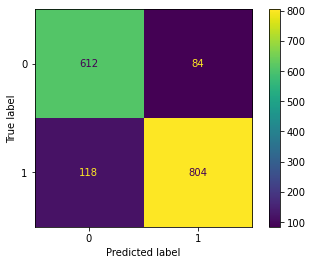

In [55]:
bacc = balanced_accuracy_score(test_labels, y_predicted)

cm = confusion_matrix(test_labels, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
print(f"BACC = {bacc * 100}")

In [56]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                            100*np.max(predictions_array),
                                            class_names[true_label]),
                                            color = color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

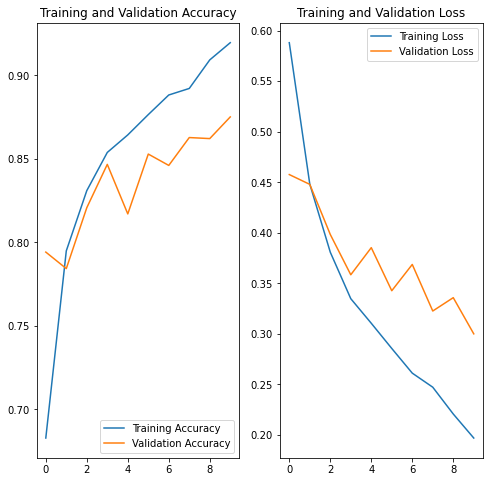

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

